In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Linear Regression**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


**Simple Linear Regression**

In [10]:
X = df[['age']]
y = df['fare']

In [11]:
# Check for null values
X.isnull().sum() / len(X) * 100

age    19.86532
dtype: float64

In [12]:
y.isnull().sum() / len(y) * 100

0.0

In [14]:
X.age.fillna(value = X['age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [15]:
X.isnull().sum() / len(X) * 100

age    0.0
dtype: float64

In [17]:
X.shape

(891, 1)

In [18]:
y.shape

(891,)

In [30]:
df_linear = df[["age", "fare"]]
df_linear

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [31]:
df_linear.isnull().sum() / len(df_linear) * 100

age     19.86532
fare     0.00000
dtype: float64

In [32]:
df_linear.age.fillna(value = df_linear['age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [33]:
df_linear.isnull().sum() / len(df_linear) * 100

age     19.86532
fare     0.00000
dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


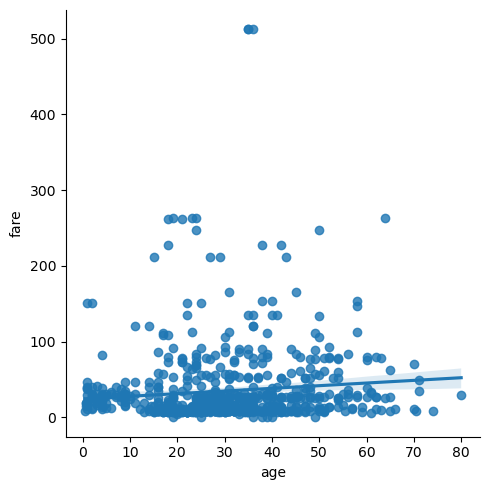

In [35]:
sns.lmplot(x = 'age', y = 'fare', data = df_linear )

<Axes: ylabel='age'>

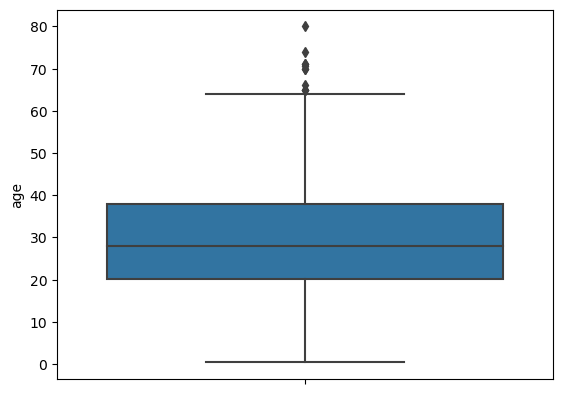

In [39]:
#IQR Methof for outliers
sns.boxplot(data = df_linear, y = 'age')

In [48]:
df_linear = df_linear[(df_linear['age'] > 5) & (df_linear['age'] < 65)]

<Axes: ylabel='age'>

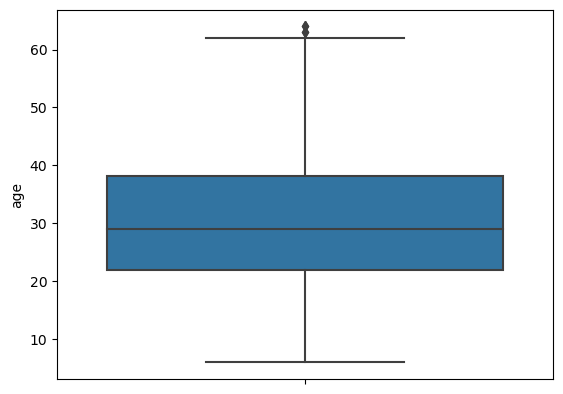

In [49]:
sns.boxplot(data = df_linear, y = 'age')

<Axes: ylabel='fare'>

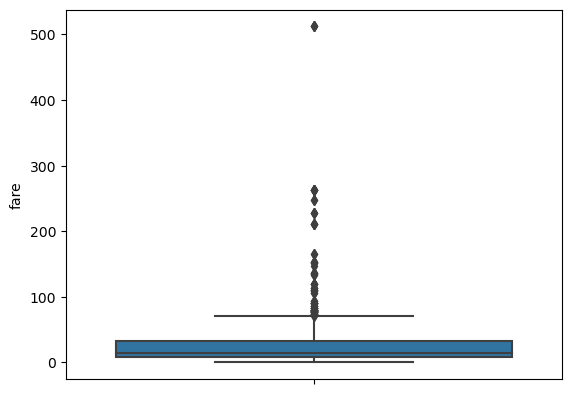

In [45]:
sns.boxplot(data = df_linear, y = 'fare')

In [50]:
df_linear = df_linear[(df_linear['fare'] > 1) & (df_linear['fare'] < 80)]

<Axes: ylabel='fare'>

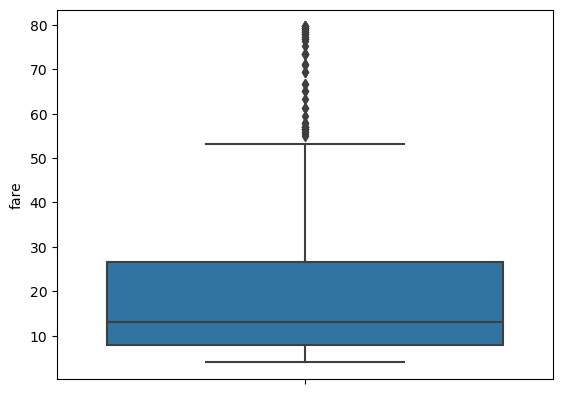

In [51]:
sns.boxplot(data = df_linear, y = 'fare')

<Axes: ylabel='fare'>

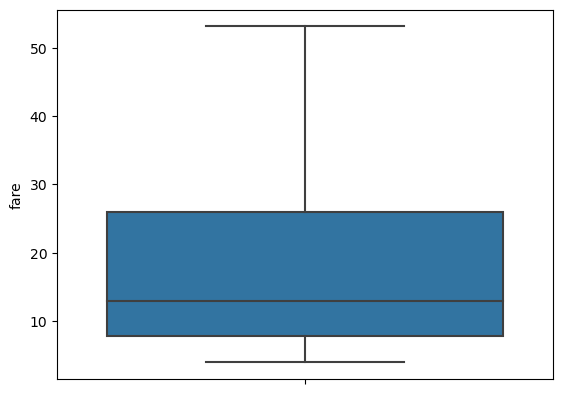

In [52]:
df_linear = df_linear[(df_linear['fare'] > 1) & (df_linear['fare'] < 55)]
sns.boxplot(data = df_linear, y = 'fare')

In [55]:
X = df_linear[['age']]
y = df_linear['fare']

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


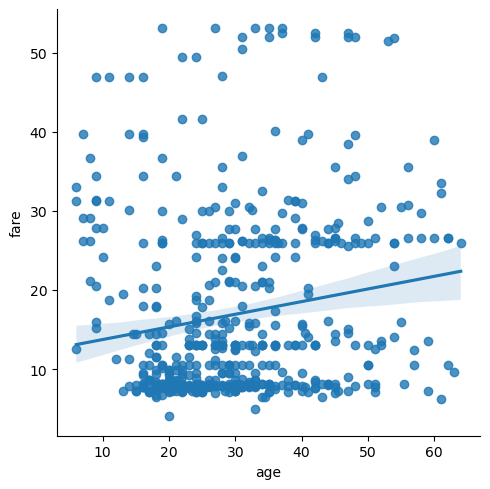

In [56]:
sns.lmplot(x = 'age', y = 'fare', data = df_linear )

In [59]:
# initiating model
model = LinearRegression()

# train the model
model.fit(X,y)

LinearRegression()

In [65]:
# now predict on basis of X
model.predict([[25]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16.13007147])

In [66]:
# model evaluation with matrix
# r2
# mean square error MSE
# mean absolute error MAE
# root mean square error RMSE

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)


In [67]:
X_train.shape

(428, 1)

In [68]:
X_test.shape

(107, 1)

In [69]:
X.shape

(535, 1)

In [75]:
# model evaluation with matrix
# r2
# mean square error MSE
# mean absolute error MAE
# root mean square error RMSE

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

# model
model = LinearRegression()

# train
model.fit(X_train, y_train)

# prediction
prediction = model.predict(X_test)
prediction

array([16.59899211, 17.67865841, 16.11914042, 14.31969657, 18.03854718,
       16.17912188, 14.31969657, 16.23910334, 14.31969657, 20.55776856,
       15.5193258 , 16.47902918, 17.19880672, 15.39936288, 17.31876964,
       15.27939996, 16.35906626, 16.35906626, 15.75925165, 18.09852864,
       16.83891795, 16.59899211, 15.87921457, 15.75925165, 15.63928872,
       16.83891795, 18.03854718, 15.63928872, 15.87921457, 16.65897357,
       17.31876964, 17.79862134, 16.71895503, 16.35906626, 16.35906626,
       17.43873257, 16.23910334, 20.67773148, 16.95888088, 16.83891795,
       17.31876964, 15.27939996, 18.63836179, 17.55869549, 17.37875111,
       14.91951119, 16.11914042, 16.83891795, 14.07977073, 16.11914042,
       15.39936288, 16.71895503, 17.55869549, 18.27847303, 17.79862134,
       15.15943703, 19.7180281 , 16.47902918, 16.11914042, 17.67865841,
       15.87921457, 16.11914042, 17.43873257, 16.05915895, 17.0788438 ,
       16.95888088, 15.75925165, 16.23910334, 15.63928872, 15.87

<Axes: xlabel='fare'>

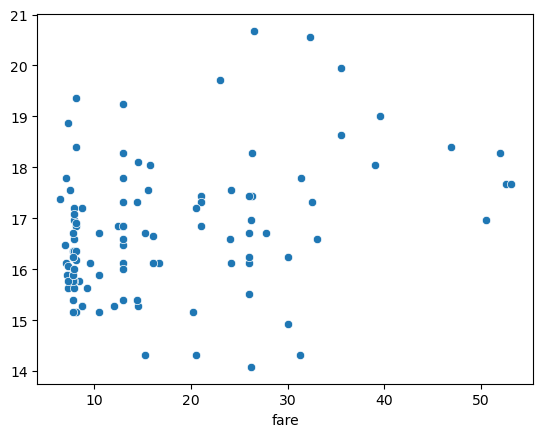

In [77]:
sns.scatterplot(x = y_test, y = prediction)

In [78]:
model.score(X_test, y_test)

0.06285304715487305

In [81]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae = mean_absolute_error(y_true = y_test, y_pred = prediction)
mse = mean_squared_error(y_true = y_test, y_pred = prediction)
rmse = mean_squared_error(y_true = y_test, y_pred = prediction, squared = False)
r2 = r2_score(y_true = y_test, y_pred = prediction)

print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2: ", r2)

MAE:  8.883919573605938
MSE:  124.53363332295862
RMSE:  11.159463845676397
R2:  0.06285304715487305
